# 볼록렌즈의 구면 수차  

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [2]:
r1 = 20 # 곡면 반지름
r2 = 20 # 곡면 반지름
d_r = 30 # 두 곡면(원)의 중심 사이의 거리 
h = 10 # 평행하게 쏘는 빛의 높이
n_air = 1.0003 # 공기의 굴절률
n_glass = 1.8 # 유리의 굴절률

r1 : (x-15)^2+y^2=20^2  
r2 : (x+15)^2+y^2=20^2

In [3]:
x1,y1 = -math.sqrt(r1**2-h**2)+(d_r/2),h # r2에서의 접점의 좌표
w1 = (-(x1-(d_r/2)))/h # r2에서의 접선의 기울기
b1 = y1-x1*w1
w1_r = -(1/w1)
b1_r = y1-x1*w1_r
print(x1,y1,w1_r,b1_r)

-2.3205080756887746 10 -0.5773502691896257 8.660254037844386


스넬의 법칙 : sin(theta1)/sin(theta2) = n2/n1  
=> sin(theta2) = sin(theta1) * n1/n2  
tan(theta2) = sin(theta2)/(math.sqrt(1-(sin(theta2)) ** 2))

굴절된 빛의 기울기를 m이라하고 tan(b) = w1_r일 때,  
tan(b+theta2) = m   
m = (w1_r+tan(theta2))/(1-w1_r * tan(theta2))

In [4]:
sin_theta1 = (h-b1_r) / (math.sqrt(x1**2+(h-b1_r)**2))
sin_theta2 = (n_air/n_glass) * sin_theta1
tan_theta2 = sin_theta2/(math.sqrt(1-(sin_theta2) ** 2))
w2 = (w1_r + tan_theta2)/(1-w1_r*tan_theta2)
b2 = y1-x1*w2
print(w2,b2)

-0.24687141729524162 9.427132882509659


In [5]:
x2 = (-((d_r/2)+w2*b2)+math.sqrt(((d_r/2)+w2*b2)**2-(w2**2+1)*(b2**2+(d_r/2)**2-r1**2)))/(w2**2+1)
y2 = w2*x2 +b2
print(x2, y2)

3.0171574580840907 8.68228294462953


In [6]:
w3 = -1/((-(x2+(d_r/2)))/y2)
b3 = y2-x2*w3
print(w3,b3)

0.481889718998592 7.228345784978882


In [7]:
tan_theta1 = (w3-w2)/(1+w2*w3)
sin_theta1 = tan_theta1/(1+tan_theta1**2)
sin_theta2 = sin_theta1 * (n_glass/n_air)
tan_theta2 = sin_theta2/(math.sqrt(1-(sin_theta2) ** 2))
w4 = (w3-tan_theta2)/(1+w3*tan_theta2)
b4 = y2 - x2*w4
print(w4,b4)

-0.7365048919953392 10.904434172428687


In [8]:
f = -b4/w4
print(f)

14.80565070367203


In [9]:
def findf(r, d, height) :
    r1 = r # 곡면 반지름
    r2 = r
    d_r = d # 두 곡면(원)의 중심 사이의 거리 
    h = height # 평행하게 쏘는 빛의 높이
    n_air = 1.0003 # 공기의 굴절률
    n_glass = 1.8 # 유리의 굴절률
    
    x1,y1 = -math.sqrt(r1**2-h**2)+(d_r/2),h # r2에서의 접점의 좌표
    w1 = (-(x1-(d_r/2)))/h # r2에서의 접선의 기울기
    b1 = y1-x1*w1
    w1_r = -(1/w1)
    b1_r = y1-x1*w1_r
    
    sin_theta1 = (h-b1_r) / (math.sqrt(x1**2+(h-b1_r)**2))
    sin_theta2 = (n_air/n_glass) * sin_theta1
    tan_theta2 = sin_theta2/(math.sqrt(1-(sin_theta2) ** 2))
    w2 = (w1_r + tan_theta2)/(1-w1_r*tan_theta2)
    b2 = y1-x1*w2
    
    x2 = (-((d_r/2)+w2*b2)+math.sqrt(((d_r/2)+w2*b2)**2-(w2**2+1)*(b2**2+(d_r/2)**2-r1**2)))/(w2**2+1)
    y2 = w2*x2 +b2
    
    w3 = -1/((-(x2+(d_r/2)))/y2)
    b3 = y2-x2*w3
    
    tan_theta1 = (w3-w2)/(1+w2*w3)
    sin_theta1 = tan_theta1/(1+tan_theta1**2)
    sin_theta2 = sin_theta1 * (n_glass/n_air)
    tan_theta2 = sin_theta2/(math.sqrt(1-(sin_theta2) ** 2))
    w4 = (w3-tan_theta2)/(1+w3*tan_theta2)
    b4 = y2 - x2*w4
    
    f = -b4/w4
    return f

C:\Users\dahyun\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
C:\Users\dahyun\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\dahyun\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in double_scalars


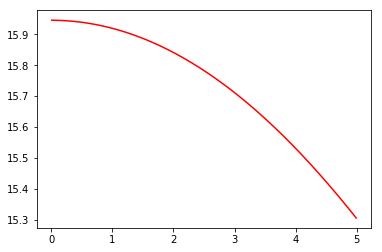

In [10]:
hlist= np.arange(0.0, 5.0, 0.01)
flist = [findf(20,30,i) for i in hlist]
plt.show()
plt.plot(hlist, flist,'r-')
plt.show()

# 렌즈 한 면은 평평하고 한 면은 구면일 때

In [11]:
def findf_(r, d, height) :
    r1 = r # 곡면 반지름
    d_r = d # 두 곡면(원)의 중심 사이의 거리 
    h = height # 평행하게 쏘는 빛의 높이
    n_air = 1.0003 # 공기의 굴절률
    n_glass = 1.8 # 유리의 굴절률
    
    x1,y1 = -math.sqrt(r1**2-h**2)+(d_r/2),h # r2에서의 접점의 좌표
    w1 = (-(x1-(d_r/2)))/h # r2에서의 접선의 기울기
    b1 = y1-x1*w1
    w1_r = -(1/w1)
    b1_r = y1-x1*w1_r
    
    sin_theta1 = (h-b1_r) / (math.sqrt(x1**2+(h-b1_r)**2))
    sin_theta2 = (n_air/n_glass) * sin_theta1
    tan_theta2 = sin_theta2/(math.sqrt(1-(sin_theta2) ** 2))
    w2 = (w1_r + tan_theta2)/(1-w1_r*tan_theta2)
    b2 = y1-x1*w2
    
    f = -b2/w2
    return f

C:\Users\dahyun\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':
C:\Users\dahyun\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


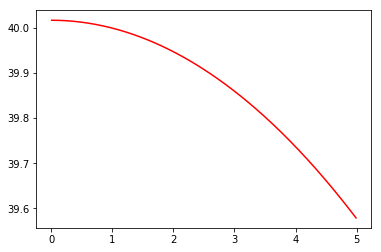

In [12]:
hlist_ = np.arange(0.0, 5.0, 0.01)
flist_ = [findf_(20,30,i) for i in hlist]
plt.plot(hlist_, flist_,'r-')
plt.show()